In [1]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”

# Section A. Model Complexity and Model Selection


We start by reading the datasets that is required in this task and split them into features/x variables and targets/labels.

In [2]:
train = read.csv("assignment1_datasets/Task1A_train.csv")
test = read.csv("assignment1_datasets/Task1A_test.csv")

In [3]:
train_features = as.matrix(train[,1])
train_target = as.matrix(train[,2])
test_features = as.matrix(test[,1])
test_target = as.matrix(test[,2])

## Question 1 [KNN Regressor]

### I

The module below implements KNN regression. It takes in train features, train target, test features and the value of K as parametrs and returns the predicted value.

In [4]:
knn <- function(train_features, train_target, test_features, k=4){
    train_len = nrow(train_features)
    test_len = nrow(test_features)
    prediction = c(1:nrow(test_features))*0

    
    distance = as.matrix(dist(rbind(test_features, train_features), method= "euclidean"))
    distance = distance[1:test_len,(test_len+1):(train_len+test_len)]
    
    for (i in 1:test_len){
        closest_index = as.data.frame(sort(distance[i,],index.return = TRUE))[1:k,2]
        prediction[i] = mean(train_target[closest_index])
    }
    
    return(as.matrix(prediction))
    
}



### II

The cell below calculates the `mean square error` for the training set and the test set.

In [5]:
errors <- data.frame('K'=1:20,"error"=1:20)

for (K in 1:20){
    prediction_test = knn(train_features,train_target,test_features,k=K)
    errors[K,"test_error"] = mean((prediction_test-test_target)**2) 
    
    prediction_train = knn(train_features,train_target,train_features,k=K)
    errors[K,"train_error"] = mean((prediction_train-train_target)**2) 
}

The cell below is used to plot the train and test error v/s the value of K chosen. To save the plot to the directory uncomment the two functions.

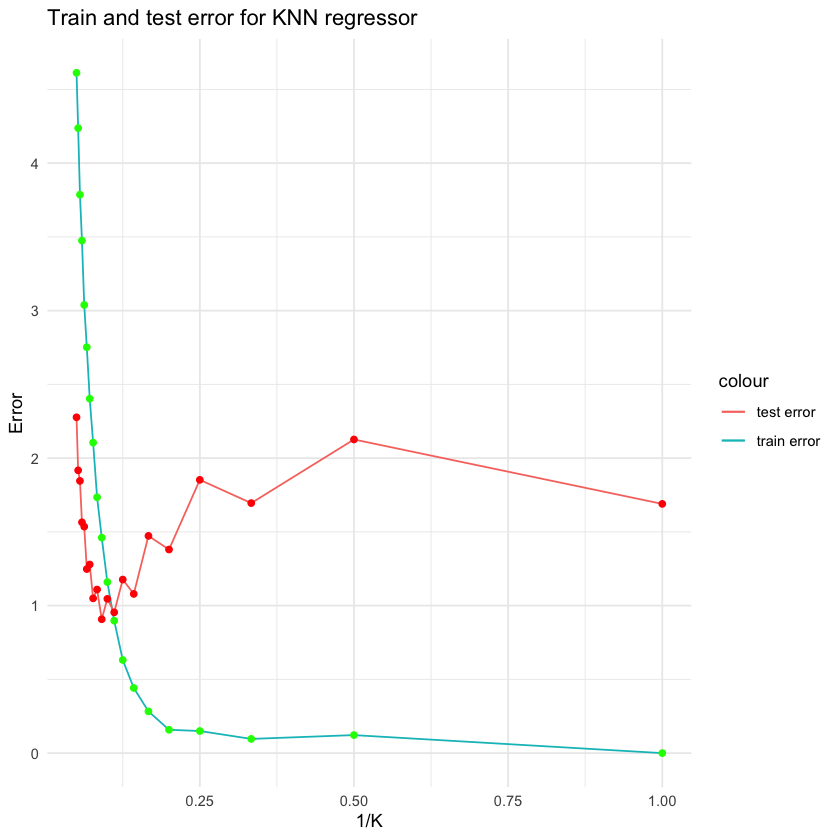

In [6]:
# jpeg('train_test_error.jpg',width = 1200, height = 350)

ggplot(data=errors,aes(x = 1/K))+geom_line(aes(y = train_error,color="train error")) +
    geom_line(aes(y = test_error,color="test error"))+
    geom_point(aes(y = test_error),color = "red") +
    geom_point(aes(y = train_error),color = "green") +
    ggtitle('Train and test error for KNN regressor') + theme_minimal() + ylab("Error")

# dev.off()

### III

The optimum value for K is 9 or 11. 
- Based on the test set only, we have the minimum error when k = 11
- On the other hand from the graph above we can also choose the optimal value of k = 9 as the training error and testing error intersect at K = 9

- From the graph above we can observe that when k = 1 the train error is close to zero but the test error is high and this situation corresponds to `overfitting`. 
- On the contrary as the value of K increses (or the value of 1/K decreases), the train error and test errors are high, which corresponds to `underfitting`